In [ ]:
import tensorflow
# Simple CNN model for CIFAR-10
from tensorflow import keras
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm as maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from keras import backend as K
#keras.backend.image_data_format()
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert from int to float and normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# transpose the dimensions of the input data
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.legacy.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))





Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 3, 32, 32)         9248      
                                                                 
 dropout_10 (Dropout)        (None, 3, 32, 32)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 16, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 28s 17ms/step - loss: 1.8206 - accuracy: 0.3421 - val_loss: 1.5723 - val_accuracy: 0.4291
Epoch 2/25
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5784 - accuracy: 0.4323 - val_loss: 1.4412 - val_accuracy: 0.4812
Epoch 3/25
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4855 - accuracy: 0.4638 - val_loss: 1.3840 - val_accuracy: 0.5005
Epoch 4/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4292 - accuracy: 0.4830 - val_loss: 1.3532 - val_accuracy: 0.5187
Epoch 5/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3920 - accuracy: 0.4982 - val_loss: 1.3037 - val_accuracy: 0.5330
Epoch 6/25
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3543 - accuracy: 0.5130 - val_loss: 1.2870 - val_accuracy: 0.5357
Epoch 7/25
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3343 - accuracy: 0.5192 - val_loss: 1.2

In [12]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm as maxnorm
from keras.optimizers import SGD
from tensorflow.python.keras.utils import np_utils
from keras import backend as K
# K.tensorflow_backend.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert from int to float and normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# transpose the dimensions of the input data
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = keras.optimizers.legacy.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 3, 32, 32)         9248      
                                                                 
 dropout_24 (Dropout)        (None, 3, 32, 32)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 16, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 16, 64)         18496     
                                                                 
 dropout_25 (Dropout)        (None, 1, 16, 64)         0         
                                                      

In [13]:
predictions = model.predict(X_test[:4])
print(predictions)
print(np.argmax(predictions, axis=1))
print(y_test[:4])



1/1 [==============================] - 0s 143ms/step
[[1.72472838e-02 6.98189484e-03 1.04654267e-01 5.25468051e-01
  8.86842012e-02 1.84843391e-01 3.29105891e-02 1.79391261e-02
  1.61804166e-02 5.09079872e-03]
 [1.70666184e-02 5.49145080e-02 8.96705678e-05 5.75010308e-05
  3.69066584e-05 3.33697753e-05 4.29818792e-05 3.20057879e-05
  9.19849396e-01 7.87705556e-03]
 [1.92524746e-01 2.69187391e-02 4.01124172e-03 2.60735489e-03
  2.38427706e-03 1.76251680e-03 2.20330767e-04 6.00529183e-03
  7.30302989e-01 3.32624689e-02]
 [7.06058681e-01 8.57870728e-02 1.86777078e-02 2.61170603e-03
  5.30834123e-03 6.26177003e-04 1.35861512e-04 1.18348844e-01
  4.02368791e-02 2.22087707e-02]]
[3 8 8 0]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


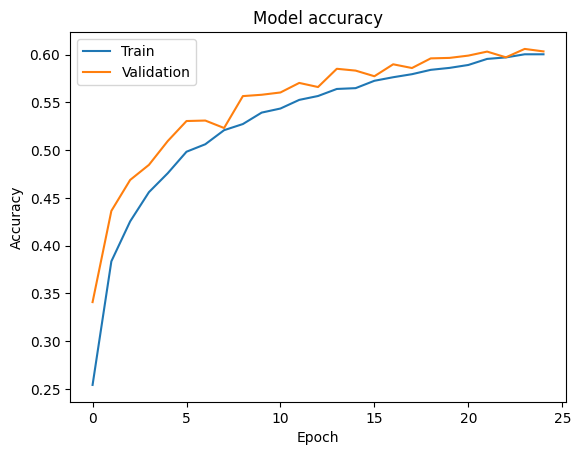

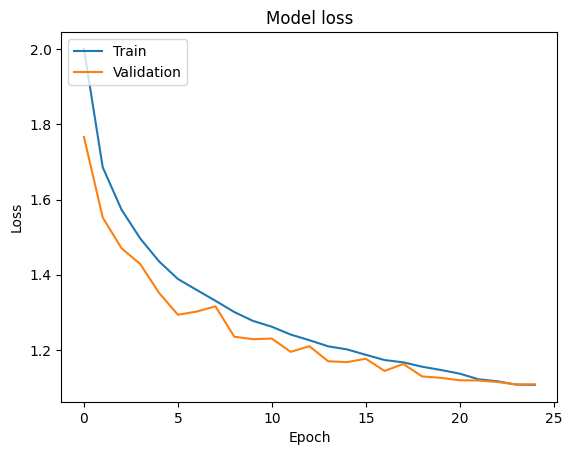

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()